In [1]:

import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [5]:
train_dataset = h5py.File('./datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels


In [13]:
test_dataset = h5py.File('./datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels


In [21]:
classes = np.array(test_dataset["list_classes"][:]) 

In [22]:
print(classes)

[b'non-cat' b'cat']


In [28]:
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [29]:
print ("Dataset dimensions:")
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
 

Dataset dimensions:
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [32]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 

In [33]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [37]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [38]:
lr = LogisticRegression(C=1000.0, random_state=0)


In [39]:
lr.fit(train_set_x.T,train_set_y.T.ravel())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000.0, random_state=0)

In [41]:
lr.coef_.shape

(1, 12288)

In [42]:
lr.coef_

array([[ 0.07860493, -0.10419983, -0.01808   , ..., -0.05128933,
        -0.11815309,  0.18137823]])

In [43]:
lr.intercept_

array([-0.10829367])

In [44]:
Y_prediction = lr.predict(test_set_x.T)


In [45]:
Y_prediction.shape
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - test_set_y)) * 100))

test accuracy: 72.0 %


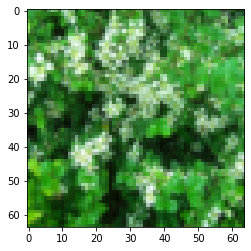

In [71]:
index = 22
plt.imshow(test_set_x_orig[index])
#

In [70]:
if Y_prediction[index] ==1:
    print("its cat")
else :
    print("its not a cat")


its not a cat
